Part 1:

Q1. What are the advantages of a CNN over a fully connected deep neural network for image classification?

A) 1.Because consecutive layers are only partially connected and because it heavily reuses its weights, a CNN has many fewer parameters than a fully connected DNN, which makes it much faster to train, reduces the risk of overfitting, and requires much less training data.

2.When a CNN has learned a kernel that can detect a particular feature, it can detect that feature anywhere on the image. In contrast, when a DNN learns a feature in one location, it can detect it only in that particular location. Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.

3.Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN's architecture embeds this prior knowledge. Lower layers typically identify features in small areas of the images, while higher layers combine the lower-level features into larger features. This works well with most natural images, giving CNNs a decisive head start compared to DNNs.

Q2. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride? 

A) A max pooling layer has no parameters at all, whereas a convolutional layer has a lot.Max pooling is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

Q3. When would you want to add a local response normalization layer?

A) This form of normalization makes the neurons that most strongly activate inhibit neurons at the same location but in neighboring feature maps. This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization.It is typically used in the lower layers to have a larger pool of low-level features that the upper layers can build upon.

4. Test below CNN codes with MNIST data set and show the model accuracy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(25)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64

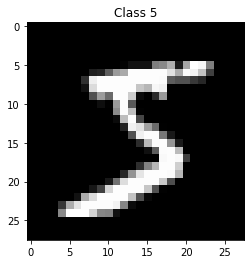

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))





X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape





number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]





# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))





model.summary()





model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])





gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()




train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)





# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
 validation_data=test_generator, validation_steps=10000//64)




score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])




predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)



We achieved 99.26% accuracy in 5 epochs using the simple model.To improve the result,we can do ensembling of models and can also use pseudo labelling to improve the accuracy.

Part 2:
     
     Test CNN over the cifar10 data set, which contains 32x32 colour images from 10 classes:

1. Use the below code to load the data set.

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


2. Show the 10 classes

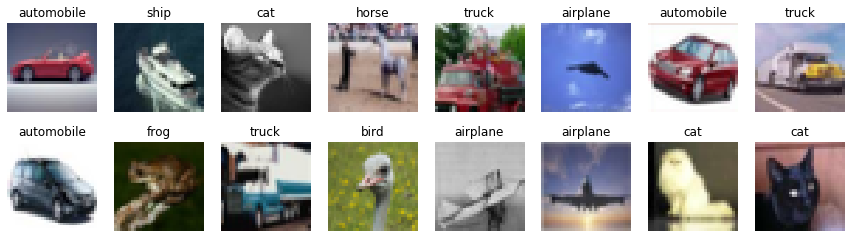

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()


3. Define a CNN architecture and train your own model by playing with the network setup: like, performs convolution, performs 2D max pooling, changing activation function from ReLU to LeakyReLU, adding dropout etc. 

In [ ]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255.0
x_test/=255.0

x_train.shape





number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(array([6], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [ ]:
model = Sequential()

# CONV 1
model.add(Conv2D(16, (3, 3), strides = (1, 1), padding="same", name = 'conv1', input_shape=(32, 32, 3))) 
model.add(LeakyReLU(0.1))

# CONV 2
model.add(Conv2D(32, (3, 3), strides = (1, 1), padding="same", name = 'conv2'))  
model.add(LeakyReLU(0.1))

# MaxPooling2D 1
model.add(MaxPooling2D((2, 2), name='max_pool_1'))

# Dropout
model.add(Dropout(0.25, noise_shape=None, seed=0))

# CONV 3
model.add(Conv2D(32, (3, 3), strides = (1, 1), padding="same", name = 'conv3')) 
model.add(LeakyReLU(0.1))

# CONV 4
model.add(Conv2D(64, (3, 3), strides = (1, 1), padding="same", name = 'conv4'))  
model.add(LeakyReLU(0.1))

# MaxPooling2D 1
model.add(MaxPooling2D((2, 2), name='max_pool_2'))

# Dropout
model.add(Dropout(0.25, noise_shape=None, seed=0))

# Flatten
model.add(Flatten())    

# FC
model.add(Dense(256, name='fc1'))
model.add(Dropout(0.5, noise_shape=None, seed=0))

# FC
model.add(Dense(NUM_CLASSES))    
model.add(Activation("softmax"))


model.summary()
    


model.compile(
    loss='categorical_crossentropy',  
    optimizer=Adam(), 
    metrics=['accuracy']  
)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 32)       

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()




train_generator = gen.flow(x_train, Y_train, batch_size=64)
test_generator = test_gen.flow(x_test, Y_test, batch_size=64)





# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=50000//64, epochs=10, 
 validation_data=test_generator, validation_steps=10000//64)


Epoch 1/10
781/781 [==============================] - 228s 292ms/step - loss: 1.5876 - accuracy: 0.4230 - val_loss: 1.3461 - val_accuracy: 0.5625
Epoch 2/10
781/781 [==============================] - 226s 289ms/step - loss: 1.1703 - accuracy: 0.5869 - val_loss: 1.1870 - val_accuracy: 0.6638
Epoch 3/10
781/781 [==============================] - 234s 300ms/step - loss: 1.0427 - accuracy: 0.6342 - val_loss: 0.7589 - val_accuracy: 0.6919
Epoch 4/10
781/781 [==============================] - 228s 292ms/step - loss: 0.9687 - accuracy: 0.6623 - val_loss: 0.8689 - val_accuracy: 0.7016
Epoch 5/10
781/781 [==============================] - 227s 291ms/step - loss: 0.9160 - accuracy: 0.6792 - val_loss: 0.8912 - val_accuracy: 0.6921
Epoch 6/10
781/781 [==============================] - 228s 292ms/step - loss: 0.8817 - accuracy: 0.6949 - val_loss: 0.7281 - val_accuracy: 0.7016
Epoch 7/10
781/781 [==============================] - 233s 299ms/step - loss: 0.8566 - accuracy: 0.7011 - val_loss: 0.9571 -

In [ ]:
y_pred_test = model.predict_proba(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
score = model.evaluate(x_test, Y_test)
print()
print('Test accuracy: ', score[1])



10000/10000 [==============================] - 11s 1ms/step

Test accuracy:  0.754800021648407


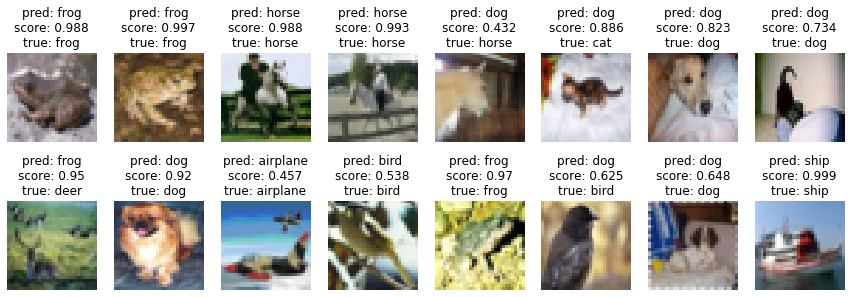

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

